In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center >= radius
    return mask

def create_ellipse_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[-a:h-a, -b:w-b]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center >= radius
    return mask

def ellipse_mask(a, b, n, r):
    y,x = np.ogrid[-a:n-a, -b:n-b]
    mask = x**2 + y**2 <= r**2
    arr = np.ones((n,n))
    arr[mask] = 255
    return arr

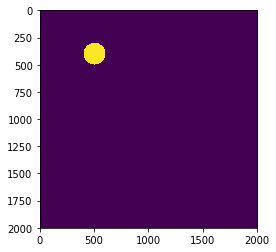

In [3]:
import numpy as np

a, b = 400, 500
n = 2000
r = 100

y,x = np.ogrid[-a:n-a, -b:n-b]
mask = x*x + y*y <= r*r

array = np.ones((n, n))
array[mask] = 255

plt.imshow(array)

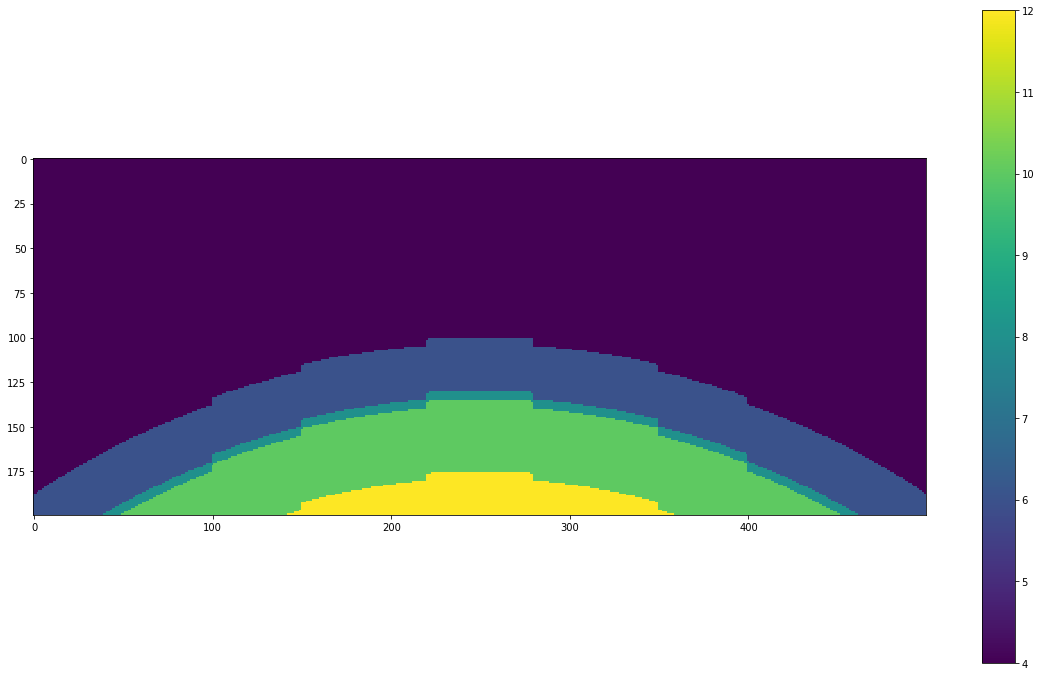

In [89]:
arr = np.ones((200,500))
center = [arr.shape[1] / 2, 550]

mask_1 = create_circular_mask(arr.shape[0], arr.shape[1], center=center, radius=450)
mask_2 = create_circular_mask(arr.shape[0], arr.shape[1], center=center, radius=420)
mask_3 = create_circular_mask(arr.shape[0], arr.shape[1], center=center, radius=415)
mask_4 = create_circular_mask(arr.shape[0], arr.shape[1], center=center, radius=375)
mask_1 = np.where(mask_1 == True, mask_1, 3)
mask_2 = np.where(mask_2 == True, mask_2, 3)
mask_3 = np.where(mask_3 == True, mask_3, 3)
mask_4 = np.where(mask_4 == True, mask_4, 3)

# plt.imshow(mask_1 + mask_2 + mask_4 + mask_3)


anticline_vp = mask_1 + mask_2 + mask_3 + mask_4

new = anticline_vp
flt_offsets = [4,4,4]

for i,j in zip(flt_offsets, [280,350,400]):
    fault = np.roll(anticline_vp, i, axis=0)[:,j:]
    new[:,j:] = fault

for i,j in zip(flt_offsets, [220,150,100]):
    fault = np.roll(anticline_vp, i, axis=0)[:,:j]
    new[:,:j] = fault
new[:50, :] = 4

    
plt.figure(figsize=(20,12))
plt.imshow(new, cmap='viridis')
plt.colorbar()

np.save('data/anticline_vp_no_faults.npy', anticline_vp)

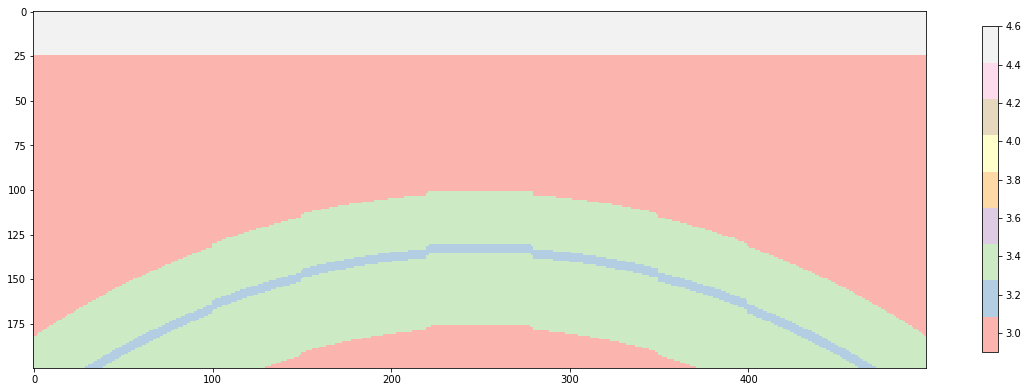

In [88]:
anticline_broad_vp_faults_5mres_20mflt = new.astype('float64')
anticline_broad_vp_faults_5mres_20mflt[:25,:] =4.6
anticline_broad_vp_faults_5mres_20mflt[anticline_broad_vp_faults_5mres_20mflt == 4] = 2.9
anticline_broad_vp_faults_5mres_20mflt[anticline_broad_vp_faults_5mres_20mflt == 6] = 3.3
anticline_broad_vp_faults_5mres_20mflt[anticline_broad_vp_faults_5mres_20mflt == 8] = 3.2
anticline_broad_vp_faults_5mres_20mflt[anticline_broad_vp_faults_5mres_20mflt == 10] = 3.3
anticline_broad_vp_faults_5mres_20mflt[anticline_broad_vp_faults_5mres_20mflt == 12] = 2.9

plt.figure(figsize=(20,12))
plt.imshow(anticline_broad_vp_faults_5mres_20mflt, aspect='equal', cmap='Pastel1')
plt.colorbar(shrink=0.5)

np.save('data/anticline_broad_vp_faults_5mres_20mflt.npy', anticline_broad_vp_faults_5mres_20mflt)

In [49]:
from skimage.transform import resize

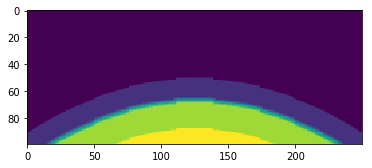

In [53]:
new_size = resize(new, output_shape=(100,250),mode='reflect', anti_aliasing=True)
plt.imshow(new_size)

In [54]:
anticline_vp_faults_5m = buttz.astype('float64')
anticline_vp_faults_5m[:50,:] =-1
anticline_vp_faults_5m[anticline_vp_faults_5m == 6] = 2.6
anticline_vp_faults_5m[anticline_vp_faults_5m == 2] = 2.6
anticline_vp_faults_5m[anticline_vp_faults_5m == 6] = 2.6
anticline_vp_faults_5m[anticline_vp_faults_5m == 4] = 2.9
anticline_vp_faults_5m[anticline_vp_faults_5m == -1] = 4.

plt.imshow(anticline_vp_faults_5m, aspect='equal', cmap='Pastel1')
plt.colorbar(shrink=0.5)

NameError: name 'buttz' is not defined

In [211]:
np.save('data/anticline_vp_faults_5m.npy', anticline_vp_faults_5m)
np.save('data/anticline_vp_5m.npy', anticline_vp)